In [77]:
import numpy as np
import pandas as pd
import stan
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/mrhome/amingk/Documents/7TPD/ActStimRL')
from Madule import utils
from Madule import plots
import arviz as az
from scipy import stats


In [78]:
# Medication effect over Parkinsdon's disease
partcipant_group = 'HC'
# number of models
# loop over list of participants
# main directory of saving
mainScarch = '/mnt/scratch/projects/7TPD/amin/'
# pickle fine in the scratch folder
pickelDir = f'{mainScarch}/realdata/{partcipant_group}/HierRL_Mixture_notdual_dual_twoLR_Act_Clr_model1.pkl'
"""Loading the pickle file of model fit from the subject directory"""
loadPkl = utils.load_pickle(load_path=pickelDir)
fit_HC = loadPkl['fit'] 
# get the linkelihood and comarision assessment       
#log_lik = fit_HC['log_lik']


In [96]:
az_summaraz = az.summary(fit_HC)

In [100]:
az_summaraz['r_hat'].mean()

1.0069025542860561

In [4]:
# Medication effect over Parkinsdon's disease
partcipant_group = 'PD'
# number of models
# loop over list of participants
# main directory of saving
mainScarch = '/mnt/scratch/projects/7TPD/amin/'
# pickle fine in the scratch folder
pickelDir = f'{mainScarch}/realdata/{partcipant_group}/HierRL_dual_twoLR_Act_Clr_model1.pkl'
"""Loading the pickle file of model fit from the subject directory"""
loadPkl = utils.load_pickle(load_path=pickelDir)
fit_PD = loadPkl['fit'] 
# get the linkelihood and comarision assessment       
log_lik = fit_PD['log_lik']


In [5]:
# Extracting posterior distributions for each of four main unkhown parameters
alphaAct_pos_HC = fit_HC["transfer_hier_alphaAct_pos_mu"] 
alphaAct_neg_HC = fit_HC["transfer_hier_alphaAct_neg_mu"] 
alphaClr_pos_HC = fit_HC["transfer_hier_alphaClr_pos_mu"] 
alphaClr_neg_HC = fit_HC["transfer_hier_alphaClr_neg_mu"] 
weight_HC = fit_HC["transfer_hier_weight_mu"] 
beta_HC = fit_HC["transfer_hier_sensitivity_mu"]

In [6]:
# Extracting posterior distributions for each of four main unkhown parameters
alphaAct_pos_PD = fit_PD["transfer_hier_alphaAct_pos_mu"] 
alphaAct_neg_PD = fit_PD["transfer_hier_alphaAct_neg_mu"] 
alphaClr_pos_PD = fit_PD["transfer_hier_alphaClr_pos_mu"] 
alphaClr_neg_PD = fit_PD["transfer_hier_alphaClr_neg_mu"] 
weight_PD = fit_PD["transfer_hier_weight_mu"] 
beta_PD = fit_PD["transfer_hier_sensitivity_mu"]

(0.0, 1.0)

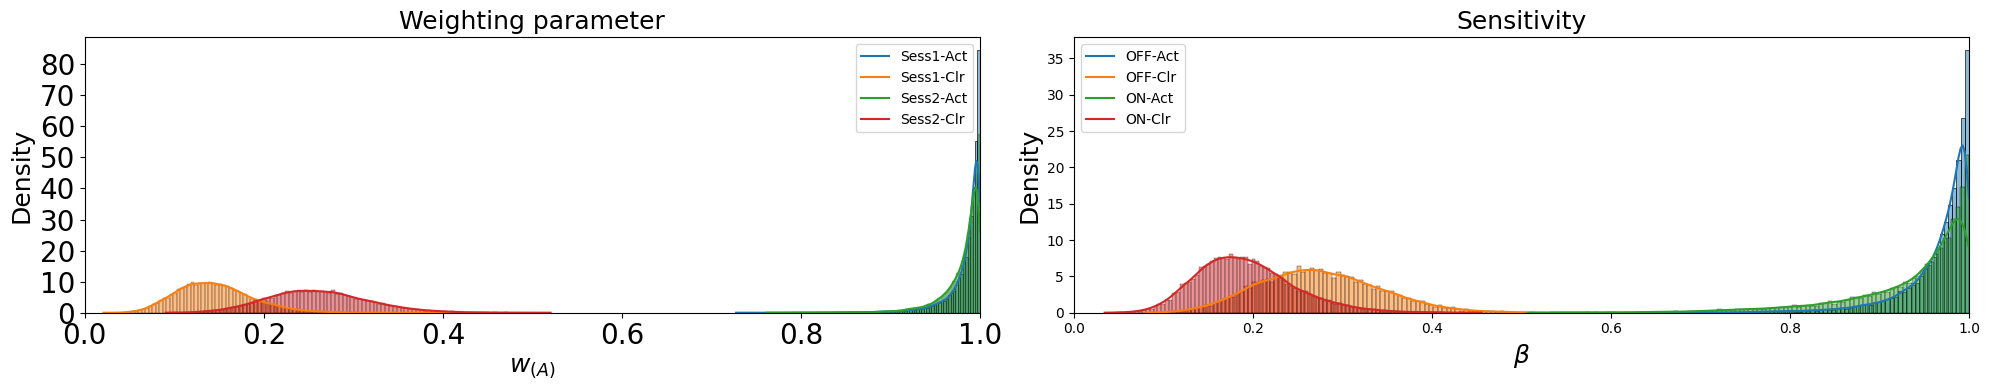

In [9]:
fig = plt.figure(figsize=(20, 4), tight_layout=True)
rows = 1
columns = 2

# Weghtening
fig.add_subplot(rows, columns, 1)
sns.histplot(weight_HC[0,0], kde=True, stat='density', bins=100)
sns.histplot(weight_HC[0,1], kde=True, stat='density', bins=100)
sns.histplot(weight_HC[1,0], kde=True, stat='density', bins=100)
sns.histplot(weight_HC[1,1], kde=True, stat='density', bins=100)
plt.title('Weighting parameter',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel('$w_{(A)}$',  fontsize=18)
plt.legend(['Sess1-Act', 'Sess1-Clr', 'Sess2-Act', 'Sess2-Clr']) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlim(0, 1)

# Sensitivity
fig.add_subplot(rows, columns, 2)
sns.histplot(weight_PD[0,0], kde=True, stat='density', bins=100)
sns.histplot(weight_PD[0,1], kde=True, stat='density', bins=100)
sns.histplot(weight_PD[1,0], kde=True, stat='density', bins=100)
sns.histplot(weight_PD[1,1], kde=True, stat='density', bins=100)
plt.title('Sensitivity',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel(r'$\beta$',  fontsize=18)
plt.legend(['OFF-Act', 'OFF-Clr', 'ON-Act', 'ON-Clr']) 
plt.xlim(0, 1)

(array([-0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 [Text(-0.30000000000000004, 0, '−0.3'),
  Text(-0.20000000000000004, 0, '−0.2'),
  Text(-0.10000000000000003, 0, '−0.1'),
  Text(0.0, 0, '0.0'),
  Text(0.09999999999999998, 0, '0.1'),
  Text(0.19999999999999996, 0, '0.2'),
  Text(0.30000000000000004, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5, 0, '0.5')])

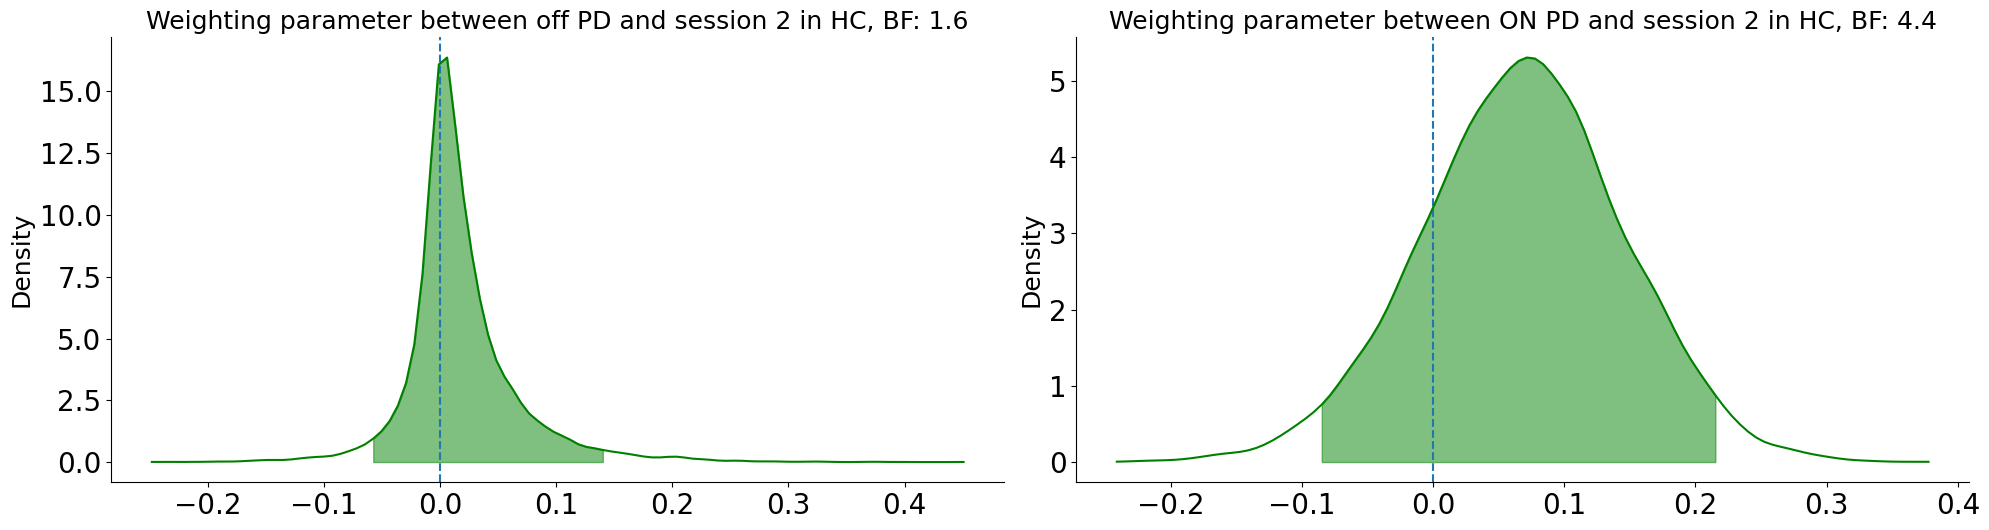

In [12]:
# Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(20, 10), tight_layout=True)
rows = 2
columns = 2

# Action Learning Rate
fig.add_subplot(rows, columns, 1)
plots.plot_posterior(x=weight_HC[0,0] - weight_PD[0,0], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((weight_HC[1,0] - weight_PD[0,0])>0)
bf = i/(1-i)
plt.title(f'Weighting parameter between off PD and session 2 in HC, BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Action Learning Rate
fig.add_subplot(rows, columns, 2)
plots.plot_posterior(x=weight_HC[1,1] - weight_PD[1,1], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((weight_HC[1,1] - weight_PD[1,1])>0)
bf = i/(1-i)
plt.title(f'Weighting parameter between ON PD and session 2 in HC, BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)


In [29]:
waic = np.array([21262, 21277, 21396,21298, 21281, 21602])

In [30]:
dwaic = waic -np.min(waic)
weight = np.zeros(len(waic))

In [31]:
weight

array([0., 0., 0., 0., 0., 0.])

In [32]:
for i in range(len(waic)):
   weight[i] = np.exp(-dwaic[i]/2)/np.sum(np.exp(-dwaic/2))

In [33]:
weight

array([9.99372443e-01, 5.52737278e-04, 7.97989326e-30, 1.52204221e-08,
       7.48048561e-05, 1.47796941e-74])

In [18]:
np.sum(np.exp(-dwaic/2))

1.0

In [17]:
dwaic

array([  119,   206,     0, 23924])

In [ ]:
# read collected data across data
behAll = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/AllBehData/behAll.csv')
behAll = behAll[behAll['patient']=='HC']

In [33]:
sublist = behAll['sub_ID'].unique()

In [44]:
transfer_weight = fit_HC['transfer_weight']

sub-030
sub-034
sub-067
sub-069
sub-076
sub-077
sub-083


(0.0, 1.0)

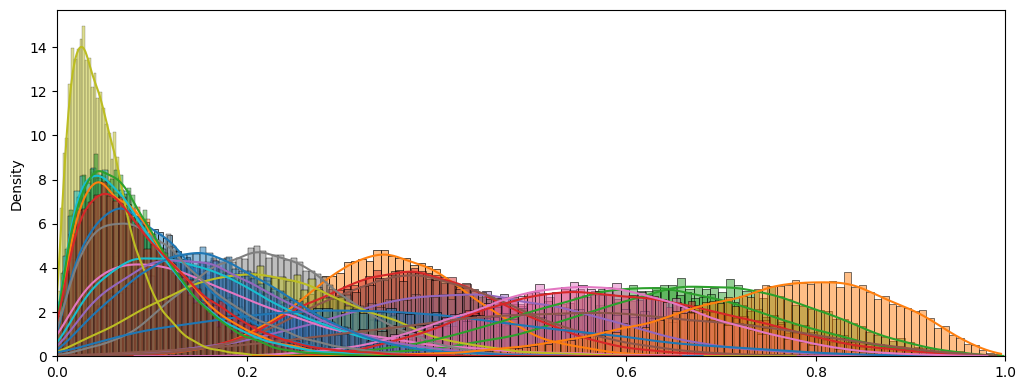

In [38]:
fig = plt.figure(figsize=(20, 4), tight_layout=True)
rows = 1
columns = 2

# Weghtening
fig.add_subplot(rows, columns, 1)

for i in range(len(sublist)):
    sns.histplot(transfer_weight[i,1,1,:], kde=True, stat='density', bins=100)
    if (transfer_weight[i,1,1,:].mean()>.4):
        print(sublist[i])
plt.xlim(0, 1)


In [8]:
# List of subjects
subList = ['sub-004', 'sub-010', 'sub-012', 'sub-025', 'sub-026', 'sub-029', 'sub-030',
           'sub-033', 'sub-034', 'sub-036', 'sub-040', 'sub-041', 'sub-042', 'sub-044', 
           'sub-045', 'sub-047', 'sub-048', 'sub-052', 'sub-054', 'sub-056', 'sub-059', 
           'sub-060', 'sub-064', 'sub-065', 'sub-067', 'sub-069', 'sub-070', 'sub-071', 
           'sub-074', 'sub-075', 'sub-076', 'sub-077', 'sub-078', 'sub-079', 'sub-080', 
           'sub-081', 'sub-082', 'sub-083', 'sub-085', 'sub-087', 'sub-088', 'sub-089', 
           'sub-090', 'sub-092', 'sub-108', 'sub-109']
len(subList)

46

In [35]:
# read collected data across data
behAll = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/AllBehData/behAll.csv')


In [36]:
withdraw_subs = ['sub-030','sub-034','sub-067','sub-069','sub-076','sub-077','sub-083']
for sub in withdraw_subs:
    behAll = behAll[behAll['sub_ID']!=sub]

In [39]:
behAll['sub_ID'].unique().shape

(39,)

In [33]:
len(sublist)

39

In [24]:
np.where(subList,'sub-004')

IndexError: arrays used as indices must be of integer (or boolean) type

ValueError: operands could not be broadcast together with shapes (46,) (2,) 

In [88]:
fit_HC['hier_theta_mu'].shape

(1, 6000)

(0.0, 1.0)

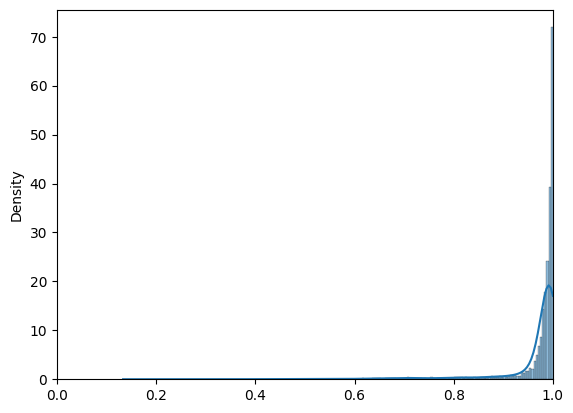

In [89]:
sns.histplot(fit_HC['transfer_hier_theta_mu'][0], kde=True, stat='density', bins=200)
plt.xlim(0, 1)

(0.0, 1.0)

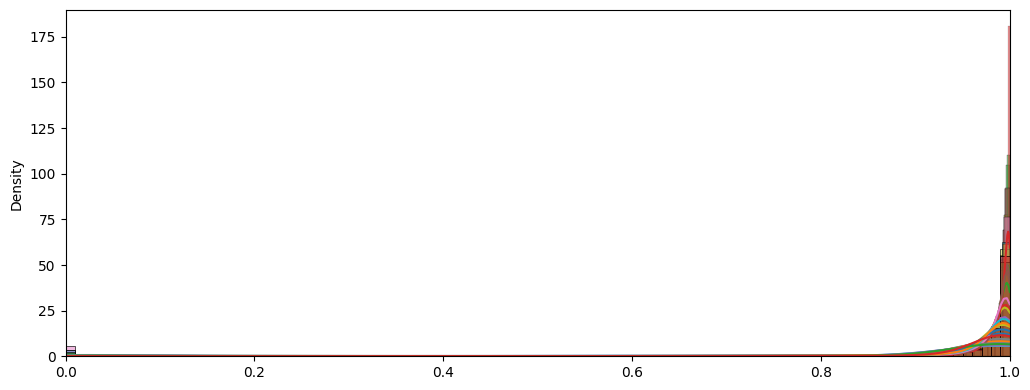

In [80]:
fig = plt.figure(figsize=(20, 4), tight_layout=True)
rows = 1
columns = 2

# Weghtening
fig.add_subplot(rows, columns, 1)

for i in range(24):
    sns.histplot(fit_HC['transfer_theta'][i], kde=True, stat='density', bins=100)
plt.xlim(0, 1)


In [71]:
prob_model = fit_HC['theta'].mean(axis=1)

In [73]:
np.prod(prob_model/(1-prob_model))

56531.43826782085

In [72]:
prob_model/(1-prob_model)

array([ 0.2583986 ,  0.3231887 , 13.95124946,  3.70075626,  2.34345122,
       12.51256707,  0.18175456,  0.65534485,  3.76768923,  0.30965171,
        1.45494709,  0.3506772 ,  7.81416725, 21.35630552,  0.29191698,
       13.57096519,  3.80300908,  0.63555351,  1.33233065,  2.98053135,
        1.2795674 ,  2.03062108,  0.40161473,  0.95238703])

In [76]:
np.sum(prob_model>.5)

14

In [92]:
fit_HC['transfer_hier_theta_mu'].mean()/(1-fit_HC['transfer_hier_theta_mu'].mean())

25.633997657473927

In [93]:
fit_HC['transfer_hier_theta_mu'].mean()

0.9624540028552798